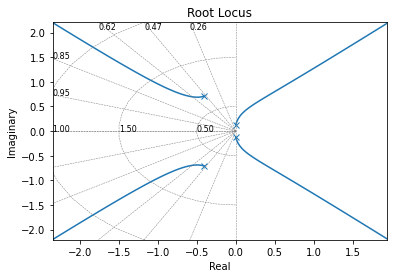

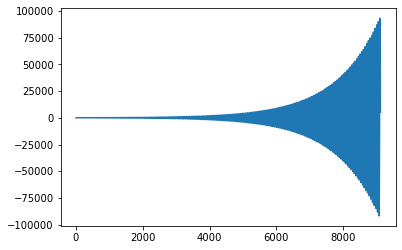

In [15]:
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
import control

%matplotlib inline

from numpy.linalg import eig
from scipy import signal as sig
from pylab import plot,xlabel,ylabel,title,legend,figure,subplots

from pylab import cos, pi, arange, sqrt, pi, array, array

# at SSL with M = 0.25, 20deg flaps extended
M = 0.25 
rho=1.225 #kg/m^3 
R=287 #Jkg/K 
gamma=1.4 
T=288 #K
g = 9.81 #m/s^2

cl0 = 1.11
cd0=0.102
cla=5.7
cda=0.66
cma=-1.26
cmad=-3.2
cmq = -20.8

u0 = M*sqrt(gamma*R*T) #m/s
Q = rho*(u0**2)/2 #Pa
W = 2508939.33 #N
m = W/g
Iy = 43798800 #kg*m^2
s = 525 #m^2
c = 9 #m


#longitudinal derivatives
Xu = -2*cd0*Q*s/(u0*m)
Zu = -2*cl0*Q*s/(u0*m)
Xw = -(cda-cl0)*Q*s/(u0*m)
Zw = -(cla+cd0)*Q*s/(u0*m)
Mw = cma*Q*s*c/(u0*Iy)
Mwd = cmad*Q*s*(c**2)/(2*(u0**2)*Iy)
Mq = cmad*Q*s*(c**2)/(2*u0*Iy)

#state space model solution
A = np.array([[Xu, Xw, 0, -g],
              [Zu, Zw, u0, 0],
              [Mwd+(Mwd*Zu), Mw+(Mwd*Zw), Mq+(Mwd*u0), 0],
              [0, 0, 1, 0]])

w1,v1 = eig(A) #w is eigenvalue, v is eigenvector
CE = np.poly(w1)
TF = control.TransferFunction(1,CE)

#phugoid
Phug = [[A[0][0], A[0][3]],
       [-(A[1][0])/u0, A[1][3]]]

S1,Ve1 = eig(Phug)
C1 = np.poly(S1)
r1 = np.roots(C1) #phugoid roots

wnph = sqrt(C1[2])
zetaph = C1[1]/(2*wnph)

#Short-Period
Za = u0*Zw
Ma = u0*Mw
Mad = u0*Mwd

SP = [[Zw, 1],
      [Ma+(Mad*(Za/u0)), Mq+Mad]]

S2,Ve2 = eig(SP)
C2 = np.poly(S2)
r2 = np.roots(C2) #SP roots

wnsp = sqrt(C2[2])
zetasp = C2[1]/(2*wnsp)

r1r = np.real(r1)
r1i = np.imag(r1)
r2r = np.real(r2)
r2i = np.imag(r2)

# Plotting

k, b = control.rlocus(TF)
plt.show()

t, s = control.step_response(TF)
plt.plot(t, s)
plt.show()